Going through experimental data collected in lab for a small, soft neural interface device
with Ben Rees

-------------------------------------------

#### Notes

- 28 micron electrode diameter 
- In the CIC data, the current used to generate the measured voltage transient is recorded in the file, meaning you wouldn't need to do much to calculate the charge injection capacity (you know the stimulation pulse width, 0.001s). 
- Optional: calculate the amount of polarization measured during the stimulation pulse as well for your report to fill it out a little.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Test three samples. Plot electrochemical impedance spectroscopy (EIS) impedance and phase from 1 Hz to 100 kHz.

In [2]:
# read in data
eis_c1 = pd.read_csv('data/Small device 2 Ch 1 eis Day 0.txt', 
                     skiprows=17, delimiter=",")
eis_c2 = pd.read_csv('data/Small device 2 Ch 2 eis Day 0.txt', 
                     skiprows=17, delimiter=",")
eis_c3 = pd.read_csv('data/Small device 2 Ch 3 eis Day 0.txt',
                     skiprows=17, delimiter=",")
eis_c4 = pd.read_csv('data/Small device 2 Ch 4 eis Day 0.txt',
                     skiprows=17, delimiter=",")

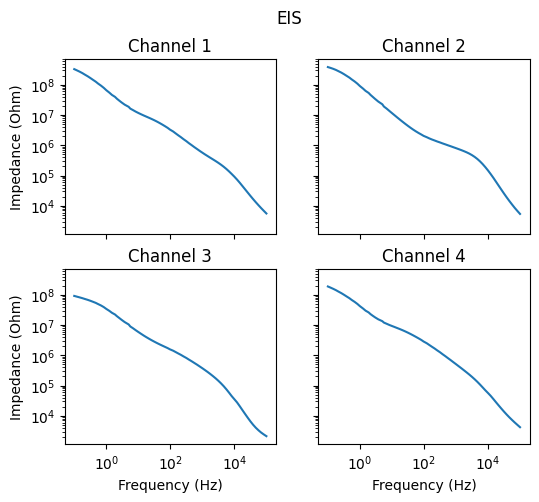

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

channels = [eis_c1, eis_c2, eis_c3, eis_c4]
titles = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

for i, (df, title) in enumerate(zip(channels, titles)):
    ax = axs[i // 2, i % 2]
    ax.loglog(df['Freq/Hz'], df[' Z/ohm'])
    ax.set_title(title)
    if i % 2 == 0:
        ax.set_ylabel('Impedance (Ohm)')
    if i // 2 == 1:
        ax.set_xlabel('Frequency (Hz)')

fig.suptitle('EIS', fontsize=12)
plt.show()

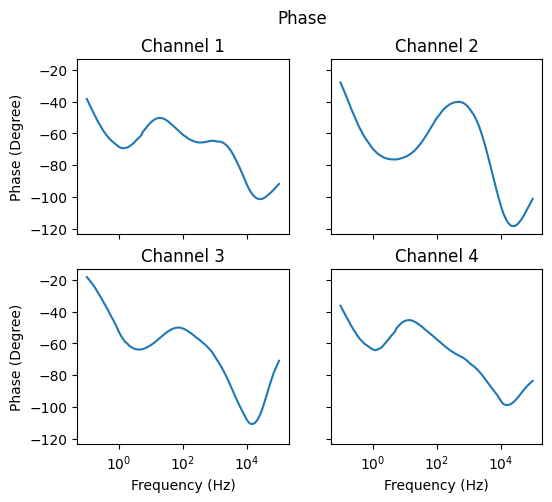

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

channels = [eis_c1, eis_c2, eis_c3, eis_c4]
titles = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

for i, (df, title) in enumerate(zip(channels, titles)):
    ax = axs[i // 2, i % 2]
    ax.semilogx(df['Freq/Hz'], df[' Phase/deg'])
    ax.set_title(title)
    if i % 2 == 0:
        ax.set_ylabel('Phase (Degree)')
    if i // 2 == 1:
        ax.set_xlabel('Frequency (Hz)')

fig.suptitle('Phase', fontsize=12)
plt.show()

In [17]:
eis_c1

,Freq/Hz,Z'/ohm,"Z""/ohm",Z/ohm,Phase/deg
0,99950.0000,-184.9,-5579.0,5582.0,-91.9
1,82520.0000,-447.2,-6847.0,6862.0,-93.7
2,68120.0000,-804.9,-8420.0,8458.0,-95.5
3,56250.0000,-1317.0,-10460.0,10540.0,-97.2
4,46440.0000,-2003.0,-13060.0,13210.0,-98.7
...,...,...,...,...,...
68,0.2143,132900000.0,-170900000.0,216400000.0,-52.1
69,0.1786,160000000.0,-183200000.0,243300000.0,-48.9
70,0.1471,190100000.0,-193300000.0,271100000.0,-45.5
71,0.1210,222500000.0,-200300000.0,299400000.0,-42.0


C:\Users\momun\AppData\Local\Temp\ipykernel_13616\3878282116.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3, 4, 5])


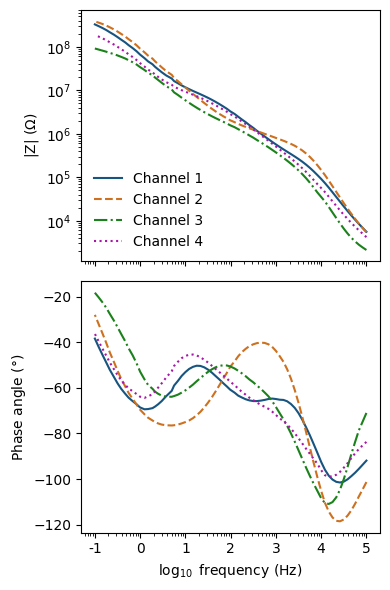

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
colors = ["#175480", "#ce701e", "#1b811b", "#a716a7"] 
linestyles = ['-', '--', '-.', ':']

for df, title, color, ls in zip(channels, titles, colors, linestyles):
    axs[0].loglog(df['Freq/Hz'], df[' Z/ohm'], label=title, color=color, linestyle=ls)
axs[0].set_ylabel(r'|Z| ($\Omega$)')
# axs[0].set_title('EIS')
axs[0].legend(frameon=False, loc='lower left')
# axs[0].grid(True, which='both', ls='--', lw=0.5)

for df, title, color, ls in zip(channels, titles, colors, linestyles):
    axs[1].semilogx(df['Freq/Hz'], df[' Phase/deg'], label=title, color=color, linestyle=ls)
axs[1].set_xlabel(r'$\log_{10}$ frequency (Hz)')
axs[1].set_ylabel(r'Phase angle ($\degree$)')
axs[1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3, 4, 5])


plt.tight_layout()
plt.show()
# fig.savefig('figs/eis_plot1_v1.pdf', dpi=300)

#### 2. Plot cyclic voltammetry (CV) at sweep rate 10-100 mV/s, in a potential window of –0.6 V to +0.8 V.

In [16]:
# read in data
cv_c1 = pd.read_csv('data/Small device 2 Ch 1 CV Day 0.txt', 
                     skiprows=40, delimiter=",")
cv_c2 = pd.read_csv('data/Small device 2 Ch 2 CV Day 0.txt', 
                     skiprows=40, delimiter=",")
cv_c3 = pd.read_csv('data/Small device 2 Ch 3 CV Day 0.txt',
                     skiprows=40, delimiter=",")
cv_c4 = pd.read_csv('data/Small device 2 Ch 4 CV Day 0.txt',
                     skiprows=40, delimiter=",")

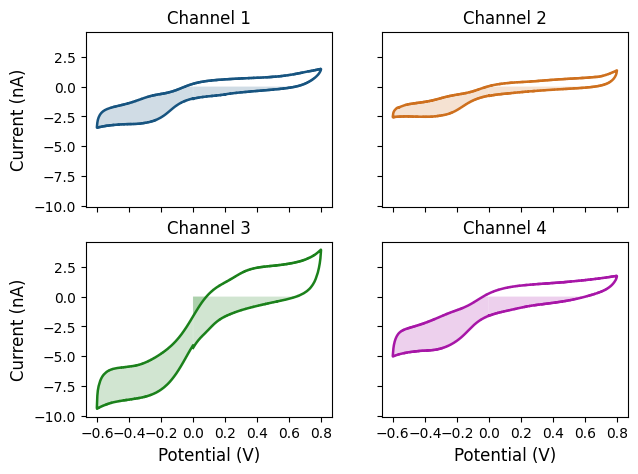

In [7]:
channels = [cv_c1, cv_c2, cv_c3, cv_c4] #new channels

fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex=True, sharey=True)
for i, (df, title, color) in enumerate(zip(channels, titles, colors)):
    ax = axs[i // 2, i % 2]
    # convert to nA
    x = df['Potential/V'].iloc[-2800:].to_numpy()
    y = (df[' Current/A'].iloc[-2800:] * 1e9).to_numpy()
    ax.plot(x, y, label=title, color=color, linewidth=1.8, zorder=2)
    m = y < 0 # lightly fill cathodic
    ax.fill_between(x, 0, y, where= m,
                facecolor=color, alpha=0.2, linewidth=0, zorder=1)
    ax.set_title(title, fontsize=12)
    if i % 2 == 0:
        ax.set_ylabel('Current (nA)', fontsize=12)
    if i // 2 == 1:
        ax.set_xlabel('Potential (V)', fontsize=12)
        ax.set_xticks(np.arange(-0.6, 0.81, 0.2))

# fig.savefig('figs/cv_plot2_v2.pdf', dpi=300)

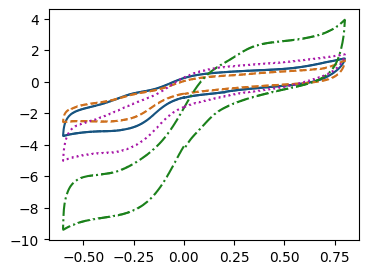

In [8]:
# plotting the final loop for each channel on a single plot, looks bad , i hate it
fig = plt.figure(figsize=(4, 3))
axes = fig.add_subplot(111)
axes.plot(cv_c1['Potential/V'][-2800:-1], cv_c1[' Current/A'][-2800:-1] * 1e9, label='Channel 1', color=colors[0], linestyle=linestyles[0])
axes.plot(cv_c2['Potential/V'][-2800:-1], cv_c2[' Current/A'][-2800:-1] * 1e9, label='Channel 2', color=colors[1], linestyle=linestyles[1])
axes.plot(cv_c3['Potential/V'][-2800:-1], cv_c3[' Current/A'][-2800:-1] * 1e9, label='Channel 3', color=colors[2], linestyle=linestyles[2])
axes.plot(cv_c4['Potential/V'][-2800:-1], cv_c4[' Current/A'][-2800:-1] * 1e9, label='Channel 4', color=colors[3], linestyle=linestyles[3])

#### 3. Calculate charge storage capacity (CSC) based on CV integration.

${CSC}_{c} = \frac{1}{\nu A} \int_{V_{min}}^{V_{max}} i(V)\, dV$

In [9]:
# use the last loop ( last 2800 rows of data for the integration)
diameter_um = 28  # micron, given
area_cm2 = np.pi * ((diameter_um * 1e-4) / 2)**2
scan_rate = 0.1 # V/s, from header

for i, df in enumerate([cv_c1, cv_c2, cv_c3, cv_c4], 1):
    last_loop = df.tail(2800).copy() # last 2800 rows
    x = last_loop['Potential/V'].to_numpy()
    y = (last_loop[' Current/A'] / area_cm2).to_numpy()  # current density A/cm^2

    #  cathodic sweep
    is_cathodic = np.r_[False, np.diff(x) < 0]
    x_cath = x[is_cathodic]
    y_cath = y[is_cathodic]

    csc_cath = np.trapezoid(y_cath, x_cath) / scan_rate
    print(f"Cathodic CSC {i}= {csc_cath*1e3:.2f} mC/cm^2")


Cathodic CSC 1= 0.67 mC/cm^2
Cathodic CSC 2= 0.85 mC/cm^2
Cathodic CSC 3= 2.47 mC/cm^2
Cathodic CSC 4= 0.52 mC/cm^2


#### 4. Plot voltage transients (VT) measured during current pulse stimulation (e.g., 1000 µs pulse width).

In [10]:
# read in CIC data 
cic_c1 = pd.read_csv('data/Small device 2 Ch 1 CIC Day 0.txt', 
                     skiprows=19, delimiter=",")
cic_c2 = pd.read_csv('data/Small device 2 Ch 2 CIC Day 0.txt',
                        skiprows=19, delimiter=",")
cic_c3 = pd.read_csv('data/Small device 2 Ch 3 CIC Day 0.txt',
                        skiprows=19, delimiter=",")
cic_c4 = pd.read_csv('data/Small device 2 Ch 4 CIC Day 0.txt',
                        skiprows=19, delimiter=",")


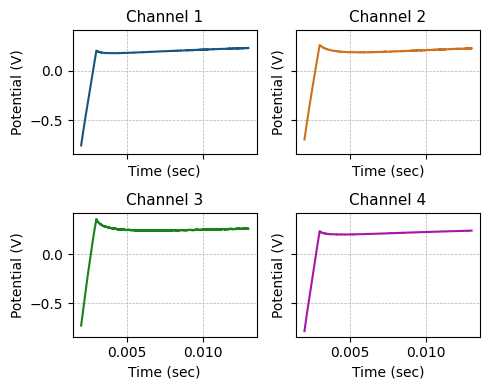

In [11]:
channels = [cic_c1, cic_c2, cic_c3, cic_c4]

fig, axs = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey=True)
for i, (df, title, color) in enumerate(zip(channels, titles, colors)):
    ax = axs[i // 2, i % 2]
    ax.plot(df['Time/sec'][200:1300], df[' Potential/V'][200:1300], color=color)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Potential (V)')
    ax.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()
# fig.savefig('figs/cic_plot3_v2.pdf', dpi=300)

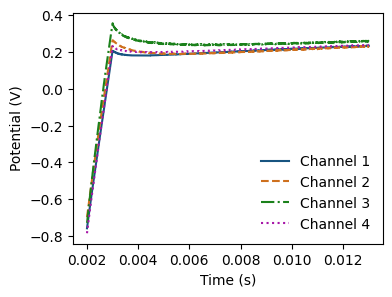

In [12]:
# plot on the same plot
fig = plt.figure(figsize=(4, 3))
axes = fig.add_subplot(111)
axes.plot(cic_c1['Time/sec'][200:1300], cic_c1[' Potential/V'][200:1300], label='Channel 1', color=colors[0], linestyle=linestyles[0])
axes.plot(cic_c2['Time/sec'][200:1300], cic_c2[' Potential/V'][200:1300], label='Channel 2', color=colors[1], linestyle=linestyles[1])
axes.plot(cic_c3['Time/sec'][200:1300], cic_c3[' Potential/V'][200:1300], label='Channel 3', color=colors[2], linestyle=linestyles[2])
axes.plot(cic_c4['Time/sec'][200:1300], cic_c4[' Potential/V'][200:1300], label='Channel 4', color=colors[3], linestyle=linestyles[3])
axes.set_xlabel('Time (s)')
axes.set_ylabel('Potential (V)')
axes.legend(frameon=False, loc='lower right')
plt.show()
# fig.savefig('figs/cic_plot3_v1.pdf', dpi=300)

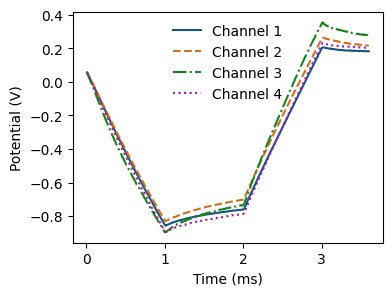

In [25]:
# more informative vt plots ## jk lol transients are not looking like the paper idk
# plot on the same plot
fig = plt.figure(figsize=(4, 3))
axes = fig.add_subplot(111)
axes.plot(cic_c1['Time/sec'][0:360] * 1e3, cic_c1[' Potential/V'][0:360], label='Channel 1', color=colors[0], linestyle=linestyles[0])
axes.plot(cic_c2['Time/sec'][0:360] * 1e3, cic_c2[' Potential/V'][0:360], label='Channel 2', color=colors[1], linestyle=linestyles[1])
axes.plot(cic_c3['Time/sec'][0:360] * 1e3, cic_c3[' Potential/V'][0:360], label='Channel 3', color=colors[2], linestyle=linestyles[2])
axes.plot(cic_c4['Time/sec'][0:360] * 1e3, cic_c4[' Potential/V'][0:360], label='Channel 4', color=colors[3], linestyle=linestyles[3])
axes.set_xlabel('Time (ms)')
axes.set_ylabel('Potential (V)')
axes.legend(frameon=False)
plt.show()
# fig.savefig('figs/cic_plot3_v2.pdf', dpi=300, bbox_inches='tight')

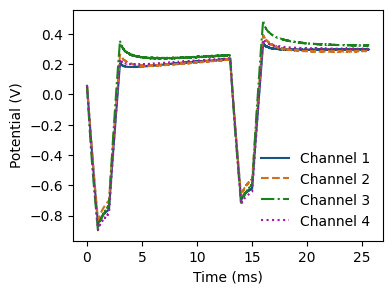

In [31]:
# more informative vt plots ## jk lol transients are not looking like the paper idk
# plot on the same plot
fig = plt.figure(figsize=(4, 3))
axes = fig.add_subplot(111)
start = 0
end  = 2560
axes.plot(cic_c1['Time/sec'][start:end] * 1e3, cic_c1[' Potential/V'][start:end], label='Channel 1', color=colors[0], linestyle=linestyles[0])
axes.plot(cic_c2['Time/sec'][start:end] * 1e3, cic_c2[' Potential/V'][start:end], label='Channel 2', color=colors[1], linestyle=linestyles[1])
axes.plot(cic_c3['Time/sec'][start:end] * 1e3, cic_c3[' Potential/V'][start:end], label='Channel 3', color=colors[2], linestyle=linestyles[2])
axes.plot(cic_c4['Time/sec'][start:end] * 1e3, cic_c4[' Potential/V'][start:end], label='Channel 4', color=colors[3], linestyle=linestyles[3])
axes.set_xlabel('Time (ms)')
axes.set_ylabel('Potential (V)')
axes.legend(frameon=False)
plt.show()
# fig.savefig('figs/cic_plot3_v3.pdf', dpi=300, bbox_inches='tight')

In [41]:
time_ms = cic_c1['Time/sec'][:1300] * 1e3
voltage1 = cic_c1[' Potential/V'][:1300]
voltage2 = cic_c2[' Potential/V'][:1300]
voltage3 = cic_c3[' Potential/V'][:1300]
voltage4 = cic_c4[' Potential/V'][:1300]


def analyze_voltage_drop(voltage):
    cathodic_start = voltage[0]  # Baseline
    cathodic_peak = np.min(voltage[:100])  # Most negative point
    total_delta_E = abs(cathodic_peak - cathodic_start)
    return cathodic_start, cathodic_peak, total_delta_E

results = []
voltages = [voltage1, voltage2, voltage3, voltage4]

for i, voltage in enumerate(voltages, 1):
    cathodic_start, cathodic_peak, total_delta_E = analyze_voltage_drop(voltage)
    results.append((cathodic_start, cathodic_peak, total_delta_E))
    
    print(f"\nChannel {i}:")
    print(f"  Baseline voltage: {cathodic_start:.3f} V")
    print(f"  Peak cathodic voltage: {cathodic_peak:.3f} V")
    print(f"  Total ΔE (entire drop): {total_delta_E:.3f} V")

baselines = [result[0] for result in results]
peaks = [result[1] for result in results]
delta_Es = [result[2] for result in results]

print(f"\n{'='*40}")
print("MEAN RESULTS ACROSS 4 ELECTRODES:")
print(f"{'='*40}")
print(f"Mean baseline voltage: {np.mean(baselines):.3f} ± {np.std(baselines):.3f} V")
print(f"Mean peak cathodic voltage: {np.mean(peaks):.3f} ± {np.std(peaks):.3f} V")
print(f"Mean total ΔE: {np.mean(delta_Es):.3f} ± {np.std(delta_Es):.3f} V")


Channel 1:
  Baseline voltage: 0.057 V
  Peak cathodic voltage: -0.851 V
  Total ΔE (entire drop): 0.908 V

Channel 2:
  Baseline voltage: 0.060 V
  Peak cathodic voltage: -0.825 V
  Total ΔE (entire drop): 0.885 V

Channel 3:
  Baseline voltage: 0.060 V
  Peak cathodic voltage: -0.896 V
  Total ΔE (entire drop): 0.956 V

Channel 4:
  Baseline voltage: 0.055 V
  Peak cathodic voltage: -0.888 V
  Total ΔE (entire drop): 0.943 V

MEAN RESULTS ACROSS 4 ELECTRODES:
Mean baseline voltage: 0.058 ± 0.002 V
Mean peak cathodic voltage: -0.865 ± 0.029 V
Mean total ΔE: 0.923 ± 0.028 V


#### 5. Calculate charge injection capacity (CIC) derived from VT data.

$ CIC = \frac{I \cdot t_{p}}{A}$

In [14]:
current_c1 = 4.7e-6  # Amps, from header of CIC data
current_c2 = 4.6e-6
current_c3 = 6e-6
current_c4 = 5e-6

pulse_width = 0.001 #sec
diameter_um = 28

capacity_c1 = current_c1 * pulse_width / area_cm2 * 1000  # mC/cm^2
capacity_c2 = current_c2 * pulse_width / area_cm2 * 1000  
capacity_c3 = current_c3 * pulse_width / area_cm2 * 1000  
capacity_c4 = current_c4 * pulse_width / area_cm2 * 1000  

print(f"Charge injection capactiy")
print(f"channel 1: {capacity_c1:.3f} mC/cm^2")
print(f"channel 2: {capacity_c2:.3f} mC/cm^2")
print(f"channel 3: {capacity_c3:.3f} mC/cm^2")
print(f"channel 4: {capacity_c4:.3f} mC/cm^2")

Charge injection capactiy
channel 1: 0.763 mC/cm^2
channel 2: 0.747 mC/cm^2
channel 3: 0.974 mC/cm^2
channel 4: 0.812 mC/cm^2


#### 6. Compare the results: If different, how are they different? Which electrode performs better or worse, and what could be the underlying reasons?

| Channel | CIC (mC/cm^2) | CSC (mC/cm^2) |
|---------|-------|------|
| C1  | 0.763 | 0.67 |
| C2  | 0.747 | 0.85 |
| C3  | 0.974 | 2.47 |
| C4  | 0.812 | 0.52 |


not sure what is going on with channel 3, storage capacity calculaiton, def busted int he methods . others seem reasonable so idek.

reasons:
- approximate area
- vibrations 
- human error
- etc


7. Suggest possible improvements to the current setup in various aspects (e.g., electrode design, measurement settings, or data acquisition).

data aquisition was goood but we only used the last loop? are we able to use all of the loops and average them out to calculate CSC. There is some discontinuty in the loop causing some issues with the intergration, i think. i think the sweep rate was 0.1 v/s but should be 0.1 - 0.01 v/s or smth like that according to the question prompt. this could be causing the mis calculations

------------------------